# Task 1 - Exploratory analysis of the data
### [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease)

###Team composition:
  - Amihaesei Sergiu
  - Stoica George

# Preliminaries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

!pip install umap-learn
!pip install projection-pursuit
import umap
from skpp import ProjectionPursuitRegressor

#When saving to HTML uncomment the line below
#pio.renderers.default = "notebook" #"colab" is default

In [2]:
data = pd.read_csv("./heart.csv")

 Checking data consistency:

In [3]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# Univariate Analysis

## Central tendence & Spread
Mode - represents the most frequent value. Since it's not included in Pandas' discribe, we had to call it separately. It returns multiple rows if there are multiple modes available, hence we only took the first row.

In [4]:
data.mode().iloc[0]

age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: float64

Describe offers descriptive statistics: the mean, median (here represented by 50%), range and standard deviation

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Form of the distribution

Skewness measures the asymmetry of a distribution:

  - When the value of the skewness if zero, the distribution follows the normal distribution
  - When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
  - When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve

In [6]:
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

Kurtosis measures the peakedness of a distribution:

  - High kurtosis in a data set is an indicator that data has heavy outliers.
  - Low kurtosis in a data set is an indicator that data has lack of outliers.

In [7]:
data.kurtosis()

age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64

## Frequencies for categorical attributes

In [8]:
categorical_variables = ["sex", "fbs", "restecg", "exang", "cp", "slope", "ca", "thal"]

for i in categorical_variables:
  print(data[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


## Graphs

### Density

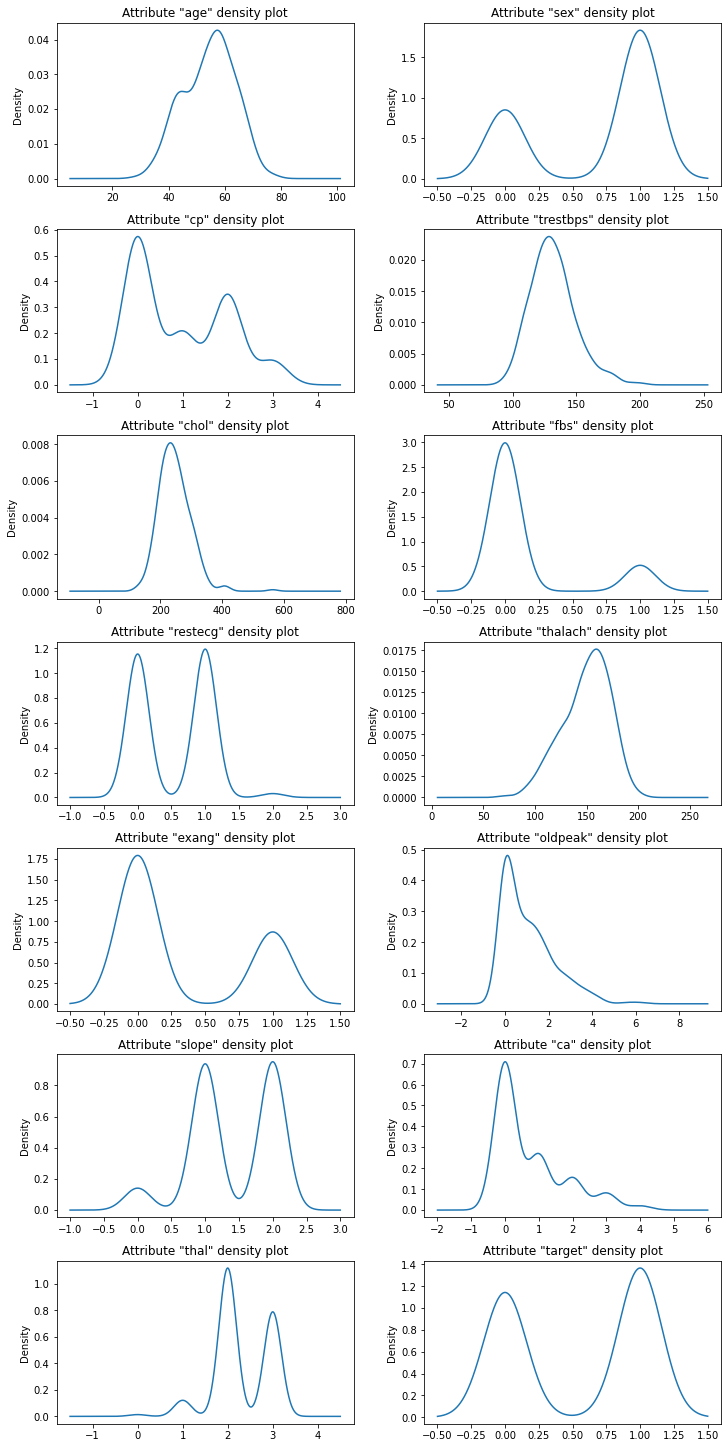

In [9]:
nrow = 7
ncol = 2

fig, axes = plt.subplots(nrow, ncol, constrained_layout=True)

count = 0
for r in range(nrow):
  for c in range(ncol):
    title = 'Attribute "' + data.columns[count] + '" density plot'
    data.iloc[:, count].plot.density(ax=axes[r,c], title=title, figsize=(10,20))

    count += 1

### Frequency

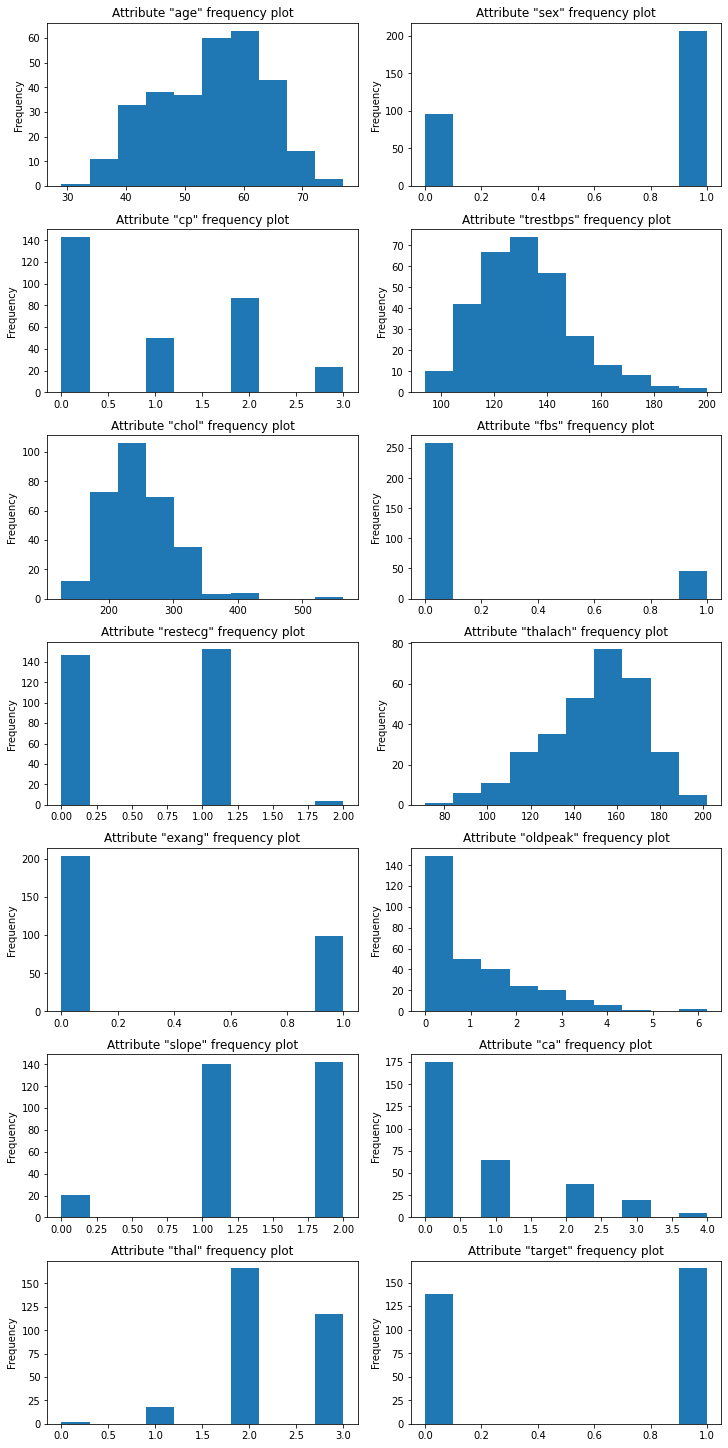

In [10]:
nrow = 7
ncol = 2

fig, axes = plt.subplots(nrow, ncol, constrained_layout=True)

count = 0
for r in range(nrow):
  for c in range(ncol):
    title = 'Attribute "' + data.columns[count] + '" frequency plot'
    data.iloc[:, count].plot.hist(ax=axes[r,c], title=title, figsize=(10,20))

    count += 1

### Boxplot

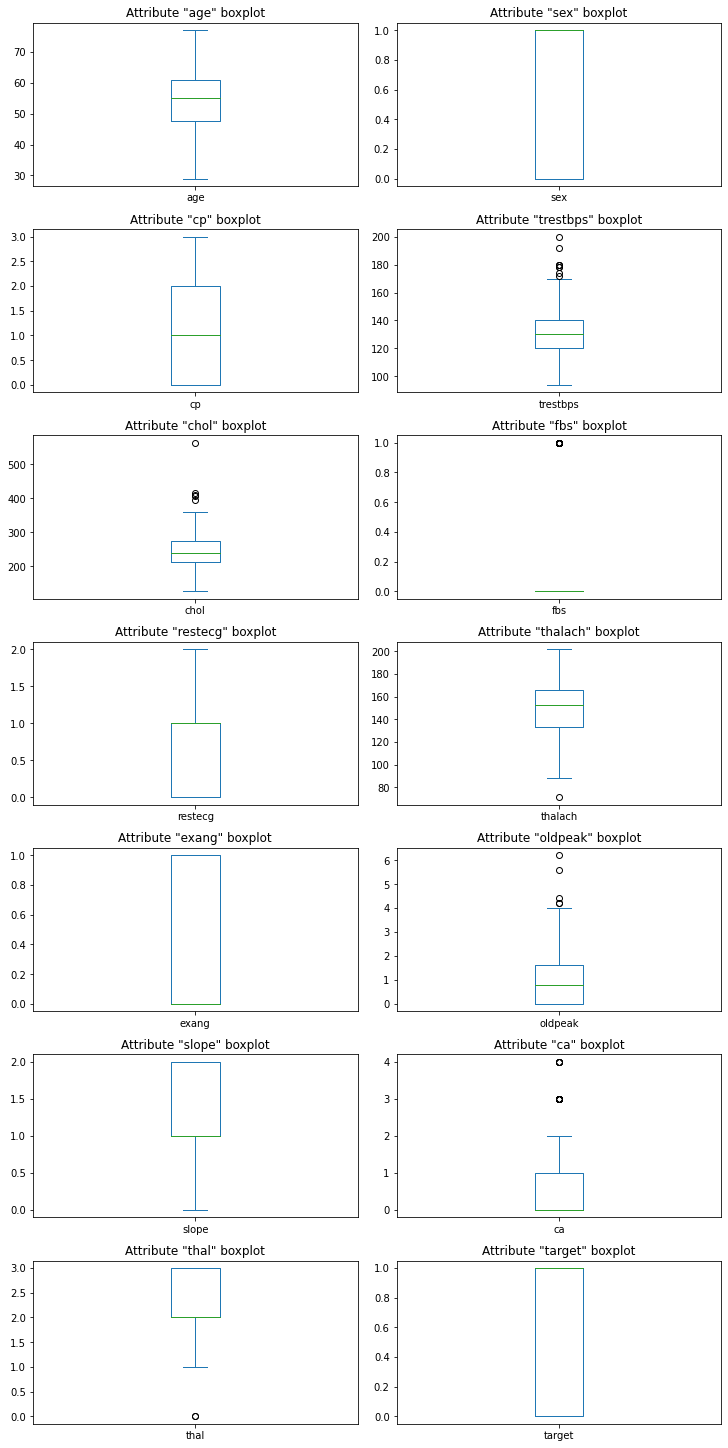

In [11]:
nrow = 7
ncol = 2

fig, axes = plt.subplots(nrow, ncol, constrained_layout=True)

count = 0
for r in range(nrow):
  for c in range(ncol):
    title = 'Attribute "' + data.columns[count] + '" boxplot'
    data.iloc[:, count].plot.box(ax=axes[r,c], title=title, figsize=(10,20))

    count += 1

# Bivariate / Multivariate Analysis

## Pearson correlation
 * Measures the strenght of the linear dependency between two variables.
 * Values closer to 1 indicate a direct correlation between attributes.
 * Values closer to -1 indicate an inverse correlation between attributes.
 * Values closer to 0 indicate no correlation between attributes.

In [12]:
data.corr(method="pearson")[:-1].style.background_gradient(cmap='Blues')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Spearman correlation
 * Unlike Pearson, works with monotonic relationships as well.

In [13]:
data.corr(method="spearman")[:-1].style.background_gradient(cmap='Blues')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


## Kendall correlation
 * Has a smaller gross error sensitivity and a smaller asymptotic variance than Spearman

In [14]:
data.corr(method="kendall")[:-1].style.background_gradient(cmap='Blues')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.082272,-0.071577,0.201071,0.135062,0.094595,-0.109349,-0.280009,0.074427,0.193269,-0.147713,0.273255,0.070722,-0.197857
sex,-0.082272,1.000000,-0.057955,-0.044438,-0.124104,0.045032,-0.048085,-0.032817,0.141664,0.086437,-0.024333,0.112199,0.244164,-0.280937
cp,-0.071577,-0.057955,1.000000,0.027548,-0.069899,0.083862,0.060839,0.246160,-0.390708,-0.125081,0.145796,-0.189400,-0.188999,0.430506
trestbps,0.201071,-0.044438,0.027548,1.000000,0.086474,0.127574,-0.105147,-0.027760,0.044419,0.109103,-0.070360,0.070387,0.049028,-0.102064
chol,0.135062,-0.124104,-0.069899,0.086474,1.000000,0.015140,-0.132664,-0.031437,0.075044,0.035176,-0.010039,0.088549,0.066255,-0.099131
fbs,0.094595,0.045032,0.083862,0.127574,0.015140,1.000000,-0.080996,-0.011749,0.025665,0.024342,-0.044546,0.126434,-0.006559,-0.028046
restecg,-0.109349,-0.048085,0.060839,-0.105147,-0.132664,-0.080996,1.000000,0.072481,-0.076913,-0.066262,0.110042,-0.091541,-0.010692,0.147678
thalach,-0.280009,-0.032817,0.246160,-0.027760,-0.031437,-0.011749,0.072481,1.000000,-0.329965,-0.306843,0.349702,-0.198407,-0.130239,0.352609
exang,0.074427,0.141664,-0.390708,0.044419,0.075044,0.025665,-0.076913,-0.329965,1.000000,0.255042,-0.267046,0.152294,0.240555,-0.436757
oldpeak,0.193269,0.086437,-0.125081,0.109103,0.035176,0.024342,-0.066262,-0.306843,0.255042,1.000000,-0.508539,0.183166,0.213656,-0.361731


## Independence tests
### Chi-Square Test for Independence
 * Used to examine the differences between categorical variables in order to evaluate the difference between the predicted and observed results
 * The p-value tells whether the test is significant or not
 * A p-value over 0.05 shows that the test is not significant enough


In [15]:
dof = 0.05

categorical_variables = ["sex", "fbs", "restecg", "exang", "cp", "slope", "ca", "thal", "target"]

for i in range(len(categorical_variables)):
    for j in range(i + 1, len(categorical_variables)):
        ct = pd.crosstab(data[categorical_variables[i]], data[categorical_variables[j]], margins=True)
        values = [ct[i][0:len(ct.index) - 1].values for i in range(len(ct.columns) - 1)]
        chi2, p, _, _ = stats.chi2_contingency(values)
        print(f"Independence between {categorical_variables[i]:<7} and {categorical_variables[j]:<7}. Chi-squared test: ")
        print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")
        print(f"{'Failed, p-value bigger than ' + str(dof) if p > dof else 'Passed'}\n")

Independence between sex     and fbs    . Chi-squared test: 
chi2: 0.372, p-value: 0.542
Failed, p-value bigger than 0.05

Independence between sex     and restecg. Chi-squared test: 
chi2: 3.697, p-value: 0.157
Failed, p-value bigger than 0.05

Independence between sex     and exang  . Chi-squared test: 
chi2: 5.449, p-value: 0.020
Passed

Independence between sex     and cp     . Chi-squared test: 
chi2: 6.822, p-value: 0.078
Failed, p-value bigger than 0.05

Independence between sex     and slope  . Chi-squared test: 
chi2: 0.648, p-value: 0.723
Failed, p-value bigger than 0.05

Independence between sex     and ca     . Chi-squared test: 
chi2: 7.848, p-value: 0.097
Failed, p-value bigger than 0.05

Independence between sex     and thal   . Chi-squared test: 
chi2: 44.626, p-value: 0.000
Passed

Independence between sex     and target . Chi-squared test: 
chi2: 22.717, p-value: 0.000
Passed

Independence between fbs     and restecg. Chi-squared test: 
chi2: 2.297, p-value: 0.317
Fai

### Fisher's Test
 * Used in the analysis of contingency tables. 
 * It works only for binary variables.
 * The p-values ilustrate the significance of the test.
 

In [16]:
dof = 0.05

binary_variables = ["sex", "fbs", "exang", "target"]

for i in range(len(binary_variables)):
    for j in range(i + 1, len(binary_variables)):
        ct = pd.crosstab(data[binary_variables[i]], data[binary_variables[j]], margins=True)
        values = [ct[i][0:len(ct.index) - 1].values for i in range(len(ct.columns) - 1)]
        ratio, p2 = stats.fisher_exact(values)
        print(f"Independence between {binary_variables[i]:<7} and {binary_variables[j]:<7}. Fisher's exact test:")
        print(f"ratio: {ratio:.3f}, p-value: {p2:.3f}")
        print(f"{'Failed, p-value bigger than ' + str(dof) if p2 > dof else 'Passed'}\n")

Independence between sex     and fbs    . Fisher's exact test:
ratio: 1.328, p-value: 0.491
Failed, p-value bigger than 0.05

Independence between sex     and exang  . Fisher's exact test:
ratio: 1.992, p-value: 0.017
Passed

Independence between sex     and target . Fisher's exact test:
ratio: 0.272, p-value: 0.000
Passed

Independence between fbs     and exang  . Fisher's exact test:
ratio: 1.163, p-value: 0.731
Failed, p-value bigger than 0.05

Independence between fbs     and target . Fisher's exact test:
ratio: 0.854, p-value: 0.631
Failed, p-value bigger than 0.05

Independence between exang   and target . Fisher's exact test:
ratio: 0.132, p-value: 0.000
Passed



### T-test Independence
 * Mostly used for identifying a statistically significant difference in the means between 2 groups.
 * We split each variable in the dataset into 2 groups, split according to each binary variable

In [17]:
binary_variables = ["sex", "fbs", "exang", "target"]

for column in data.columns:
    for attribute in binary_variables:
        if column != attribute:
            group_1 = data[column][data[attribute] == 1]
            group_2 = data[column][data[attribute] == 0]
            p, t = stats.ttest_ind(group_1, group_2)
            print(f"Variable {column:<8} separated by {attribute:<6} has t-value: {t:.3f} and p-value: {p:.3f}.")
            print(f"{'Failed, p-value bigger than 0.05' if p > 0.05 else 'Passed'}\n")

Variable age      separated by sex    has t-value: 0.087 and p-value: -1.716.
Passed

Variable age      separated by fbs    has t-value: 0.035 and p-value: 2.120.
Failed, p-value bigger than 0.05

Variable age      separated by exang  has t-value: 0.093 and p-value: 1.687.
Failed, p-value bigger than 0.05

Variable age      separated by target has t-value: 0.000 and p-value: -4.015.
Passed

Variable sex      separated by fbs    has t-value: 0.435 and p-value: 0.782.
Failed, p-value bigger than 0.05

Variable sex      separated by exang  has t-value: 0.014 and p-value: 2.483.
Failed, p-value bigger than 0.05

Variable sex      separated by target has t-value: 0.000 and p-value: -5.079.
Passed

Variable cp       separated by sex    has t-value: 0.392 and p-value: -0.857.
Passed

Variable cp       separated by fbs    has t-value: 0.101 and p-value: 1.646.
Failed, p-value bigger than 0.05

Variable cp       separated by exang  has t-value: 0.000 and p-value: -7.444.
Passed

Variable cp    

## Vizualization

### Scatterplot on 2-variable combinations

In [18]:
fig = go.Figure()

axis_labels = []

count = 0
for i in range(len(data.columns)):
    for j in range(i + 1, len(data.columns)):
      count += 1

      fig.add_trace(
          go.Scatter(x=data.iloc[:, i], y=data.iloc[:, j], mode='markers')
      )

      axis_labels.append([data.columns[i], data.columns[j]])

fig.data[count - 1].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i),
               "xaxis.title": axis_labels[i][0],
               "yaxis.title": axis_labels[i][1]
               }],
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=count - 1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

###3D Graphs

In [19]:
variables = ["age", "trestbps", "chol", "thalach", "oldpeak"]

axis_labels = []

fig = go.Figure()

count = 0
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        for k in range(j + 1, len(variables)):
          count += 1

          fig2 = px.scatter_3d(data, x=variables[i],
                              y=variables[j],
                              z=variables[k],
                              color="target")

          fig.add_trace(fig2.data[0])

          axis_labels.append([variables[i], variables[j], variables[k]])

fig.data[count - 1].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i),
               "scene.xaxis.title": axis_labels[i][0],
               "scene.yaxis.title": axis_labels[i][1],
               "scene.zaxis.title": axis_labels[i][2],
               "scene.x.label": "1"
               }],
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=count - 1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

## Principal Components Analysis
 * PCA is used in order to reduce dimensionality, increase interpretability while also minimizing information loss.
 * Using the first 3 principal components we would explain more than 40% of the variance.

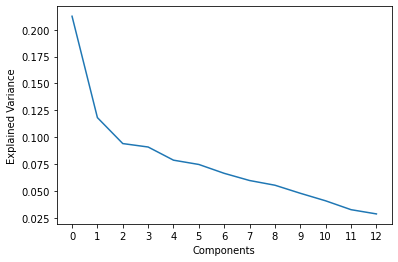

In [20]:
normalized_data = data
normalized_data = normalized_data.drop(columns=["target"])
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

pca = PCA(n_components=normalized_data.shape[1])
pca.fit(normalized_data)

%matplotlib inline
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xticks([i for i in range(len(pca.explained_variance_ratio_))])
plt.show()

#### Using 3 principal components:

In [21]:
pca3 = PCA(n_components=3)
new_data_3 = pca3.fit_transform(normalized_data)

new_data_3 = pd.DataFrame(data = new_data_3, columns = ['PCA 1', 'PCA 2', 'PCA 3'])

print(f'Explained variation per principal component: {pca3.explained_variance_ratio_}. Total: {sum(pca3.explained_variance_ratio_)}')

pca_by_variables = pd.DataFrame(pca3.components_, columns = data.drop(columns="target").columns)

Explained variation per principal component: [0.21254053 0.11820708 0.09406418]. Total: 0.4248117853438838


#### How much does each variable contribute to the principal components

In [22]:
pca_by_variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.314203,0.090838,-0.274607,0.183920,0.117375,0.073640,-0.127728,-0.416498,0.361267,0.419639,-0.379772,0.273262,0.222024
1,0.406149,-0.377792,0.297266,0.438187,0.364514,0.317433,-0.220882,0.077876,-0.263118,-0.052255,0.048374,0.094147,-0.200720
2,-0.094077,0.554849,0.356974,0.203849,-0.407825,0.481736,-0.089191,0.158255,-0.126356,0.110343,-0.073818,0.183569,0.125011


In [23]:
new_data_3["target"] = data["target"]

fig = px.scatter_3d(new_data_3, x=new_data_3.columns[0], y=new_data_3.columns[1], z=new_data_3.columns[2], color='target')
fig.show()

###Non-linear bi-dimensional mappings

####Sammon
Python doesn't have a library that includes Sammon mapping.
That being said, we used the function from [this repo](https://github.com/tompollard/sammon/blob/master/sammon.py)

In [24]:
def sammon(x, n, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'default'):
    import numpy as np 
    from scipy.spatial.distance import cdist

    if inputdist == 'distance':
        D = x
        if init == 'default':
            init = 'cmdscale'
    else:
        D = cdist(x, x)
        if init == 'default':
            init = 'pca'

    if inputdist == 'distance' and init == 'pca':
        raise ValueError("Cannot use init == 'pca' when inputdist == 'distance'")

    if np.count_nonzero(np.diagonal(D)) > 0:
        raise ValueError("The diagonal of the dissimilarity matrix must be zero")

    N = x.shape[0]
    scale = 0.5 / D.sum()
    D = D + np.eye(N)     

    print(np.count_nonzero(D<=0))

    if np.count_nonzero(D<=0) > 0:
        raise ValueError("Off-diagonal dissimilarities must be strictly positive")   

    Dinv = 1 / D
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n]
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = cdist(y,y) + np.eye(N)
    dinv = 1. / d
    delta = D-d 
    E = ((delta**2)*Dinv).sum() 

    for i in range(maxiter):
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        for j in range(maxhalves):
            s_reshape = np.reshape(s, (-1,n),order='F')
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = 0.5*s

        if j == maxhalves-1:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        if abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        E = E_new
        if display > 1:
            print('epoch = %d : E = %12.10f'% (i+1, E * scale))

    if i == maxiter-1:
        print('Warning: maxiter exceeded. Sammon mapping may not have converged...')

    E = E * scale
    
    return [y,E]

In [25]:
data = pd.read_csv("./heart.csv")

data_matrix = data.to_numpy()[:, :-1]
x, index = np.unique(data_matrix, axis=0, return_index=True)
target = data.to_numpy()[:, -1]
target = target[index]

y, E = sammon(x, 2)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y[target==0, 0], y=y[target==0, 1],
                    mode='markers',
                    name='Negative Heart Disease'))
fig.add_trace(go.Scatter(x=y[target==1, 0], y=y[target==1, 1],
                    mode='markers',
                    name='Positive Heart Disease'))

fig.update_layout(title='Sammon Mapping')

fig.show()


0
epoch = 1 : E = 0.0181604779
epoch = 2 : E = 0.0176883499
epoch = 3 : E = 0.0142568584
epoch = 4 : E = 0.0110573232
epoch = 5 : E = 0.0101883796
epoch = 6 : E = 0.0098278906
epoch = 7 : E = 0.0096836608
epoch = 8 : E = 0.0095361633
epoch = 9 : E = 0.0094897114
epoch = 10 : E = 0.0094344619
epoch = 11 : E = 0.0094111562
epoch = 12 : E = 0.0093880317
epoch = 13 : E = 0.0093754583
epoch = 14 : E = 0.0093664388
epoch = 15 : E = 0.0093606849
epoch = 16 : E = 0.0093569435
epoch = 17 : E = 0.0093544723
epoch = 18 : E = 0.0093527011
epoch = 19 : E = 0.0093515285
epoch = 20 : E = 0.0093507524
epoch = 21 : E = 0.0093501950
epoch = 22 : E = 0.0093497684
epoch = 23 : E = 0.0093493848
epoch = 24 : E = 0.0093493031
epoch = 25 : E = 0.0093484702
epoch = 26 : E = 0.0093481235
epoch = 27 : E = 0.0093479421
epoch = 28 : E = 0.0093478068
epoch = 29 : E = 0.0093477537
epoch = 30 : E = 0.0093476930
epoch = 31 : E = 0.0093472257
epoch = 32 : E = 0.0093471423
epoch = 33 : E = 0.0093470615
epoch = 34 : E = 

####t-SNE

In [26]:
y = TSNE(n_components=2, learning_rate='auto', init="pca").fit_transform(x)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y[target==0, 0], y=y[target==0, 1],
                    mode='markers',
                    name='Negative Heart Disease'))
fig.add_trace(go.Scatter(x=y[target==1, 0], y=y[target==1, 1],
                    mode='markers',
                    name='Positive Heart Disease'))

fig.update_layout(title='t-SNE Mapping')

fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



####uMap

In [27]:
y = umap.UMAP().fit_transform(x)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y[target==0, 0], y=y[target==0, 1],
                    mode='markers',
                    name='Negative Heart Disease'))
fig.add_trace(go.Scatter(x=y[target==1, 0], y=y[target==1, 1],
                    mode='markers',
                    name='Positive Heart Disease'))

fig.update_layout(title='uMap Mapping')

fig.show()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



###Projection Pursuit

In [28]:
transformer = ProjectionPursuitRegressor(r=2)
y = transformer.fit_transform(x, target)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y[target==0, 0], y=y[target==0, 1],
                    mode='markers',
                    name='Negative Heart Disease'))
fig.add_trace(go.Scatter(x=y[target==1, 0], y=y[target==1, 1],
                    mode='markers',
                    name='Positive Heart Disease'))

fig.update_layout(title='Projection Pursuit')

fig.show()

###Conditioned boxplots

In [29]:
numerical_variables = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_variables = ["sex", "fbs", "restecg", "exang", "cp", "slope", "ca", "thal", "target"]
axis_labels = []

fig = go.Figure()

count = 0

for nv in numerical_variables:
  for cv in categorical_variables:
    count += 1

    axis_labels.append([cv, nv])
    fig.add_trace(go.Box(x=data[cv], y=data[nv]))

fig.data[count - 1].visible = True

steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i),
               "xaxis.title": axis_labels[i][0],
               "yaxis.title": axis_labels[i][1]
               }],
    )
    step["args"][0]["visible"][i] = True
    steps.append(step)

sliders = [dict(
    active=count - 1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

###Overlay Histogram

In [30]:
numerical_variables = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_variables = ["sex", "fbs", "restecg", "exang", "cp", "slope", "ca", "thal", "target"]
axis_labels = []
show_traces = []

fig = go.Figure()

count = 0

for nv in numerical_variables:
  for cv in categorical_variables:
    fig2 = px.histogram(data, x=nv, color=cv)
    traces_to_show = []

    for i in range(len(fig2.data)):
      traces_to_show.append(count)
      count += 1

      histogram = fig2.data[i]
      histogram.name = cv + " " + str(histogram.name)
      histogram.opacity = 0.8
      fig.add_trace(histogram)

    show_traces.append(traces_to_show)
    axis_labels.append([nv, cv])

steps = []
for i in range(len(show_traces)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Showing in relation to " + axis_labels[i][1],
               "xaxis.title": axis_labels[i][0],
               "yaxis.title": "count"
               }],
    )

    for j in show_traces[i]:
      step["args"][0]["visible"][j] = True

    steps.append(step)

sliders = [dict(
    active=count - 1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    barmode="overlay"
)

fig.show()

###Stacked Histogram

In [31]:
numerical_variables = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_variables = ["sex", "fbs", "restecg", "exang", "cp", "slope", "ca", "thal", "target"]
axis_labels = []
show_traces = []

fig = go.Figure()

count = 0

for nv in numerical_variables:
  for cv in categorical_variables:
    fig2 = px.histogram(data, x=nv, color=cv)
    traces_to_show = []

    for i in range(len(fig2.data)):
      traces_to_show.append(count)
      count += 1

      histogram = fig2.data[i]
      histogram.name = cv + " " + str(histogram.name)
      histogram.opacity = 0.8
      fig.add_trace(histogram)

    show_traces.append(traces_to_show)
    axis_labels.append([nv, cv])

steps = []
for i in range(len(show_traces)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Showing in relation to " + axis_labels[i][1],
               "xaxis.title": axis_labels[i][0],
               "yaxis.title": "count"
               }],
    )

    for j in show_traces[i]:
      step["args"][0]["visible"][j] = True

    steps.append(step)

sliders = [dict(
    active=count - 1,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    barmode="stack"
)

fig.show()